Division of groups withing a DataSet:
  - Maximize the similarity intragroup while maximizing dissimilarity inter-groups
  
Two applications:
  - Market segmentation
  - Image segmentation
  
Difference between clasification and clustering:
  - Clasification is logistic regression in machine learning terms, we have labels (supervised learning, we know the groups in which we can classify data)
  - In Clustering we do not have labels (unsupervised learning) we cluster the data in different groups be we do not know if these clusters are: the right number, correct at all or useful whatsoever. Moreover, the output we get is soething we must name ourselves.
  - Classification is predicting an output category given input data
  - Clustering is grouping data points together based on similarities among them and differences from others.
  
Two Math pre-requisites:

  - Know how to measure the distance between two data points (euclidean distance)
  
  - Define the term "Centroid": Mean position of a group of points
  
### K.Means clustering:
    - First we choose the number of clusters (K)
    - The we choose the starting centroids(seeds), at random or based on previous data
    - Assign each point of data to a seed (by proximity in the graph)
    - Then we adjust the centroids to be in the center of their respective clusters
    - reassing any points that are now closer to a centroid that it was not the initial one, recalculate the centroid and repeat untill all is well adjusted

In [2]:
# Import relevant libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [5]:
#Load the data:

data = pd.read_csv('D:/DOCUMENTOS/Programacion/DS_BootCamp_Udemy/Resources/3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


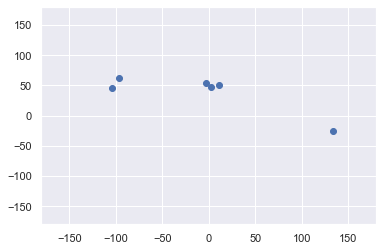

In [6]:
# Plot the data:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.show()

In [8]:
# Select the features
x = data.iloc[:,1:3] # First argument: row indices, Second argument: column indeces
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [17]:
# Clustering
kmeans = KMeans(3) # The num in brackets is the num of clusters we want. now kmeans is a KMeans object

In [18]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
# Clustering results
identified_clusters = kmeans.fit_predict(x)
identified_clusters # Five obs in the first cluster (0), and one in the second cluster (2)

array([2, 2, 0, 0, 0, 1])

In [20]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


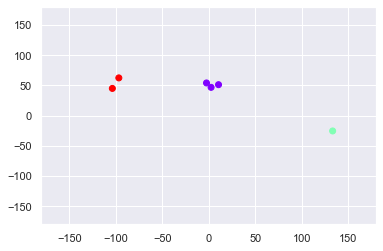

In [21]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.show()